In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

## Moving Average Crossover Strategy

In [2]:
data = yf.download('MSFT')
display(data.head(3))
display(data.tail(3))

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.097222,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.100694,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.102431,133171200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-20,446.299988,446.529999,441.269989,445.700012,445.700012,19877400
2024-06-21,447.380005,450.579987,446.510010,449.779999,449.779999,34486200
2024-06-24,449.799988,452.750000,446.410004,447.670013,447.670013,15896100


In [3]:
data['Fast_MA'] = data['Close'].rolling(window=10).mean()
data['Slow_MA'] = data['Close'].rolling(window=50).mean()
data.iloc[30:40]

,Open,High,Low,Close,Adj Close,Volume,Fast_MA,Slow_MA
Date,,,,,,,,
1986-04-25,0.111111,0.121962,0.111111,0.117188,0.117188,85795200,0.104123,NaN
1986-04-28,0.117188,0.118924,0.116319,0.118056,0.118056,28886400,0.105859,NaN
1986-04-29,0.118056,0.118056,0.113715,0.114583,0.114583,30326400,0.107248,NaN
1986-04-30,0.114583,0.115451,0.109375,0.111979,0.111979,30902400,0.108030,NaN
1986-05-01,0.111979,0.111979,0.108507,0.110243,0.110243,54345600,0.108550,NaN
1986-05-02,0.110243,0.111979,0.109375,0.110243,0.110243,20246400,0.109418,NaN
1986-05-05,0.110243,0.110243,0.109375,0.109375,0.109375,3254400,0.110200,NaN
1986-05-06,0.110243,0.111979,0.110243,0.110243,0.110243,9734400,0.111241,NaN
1986-05-07,0.110243,0.111111,0.108507,0.110243,0.110243,5155200,0.112240,NaN


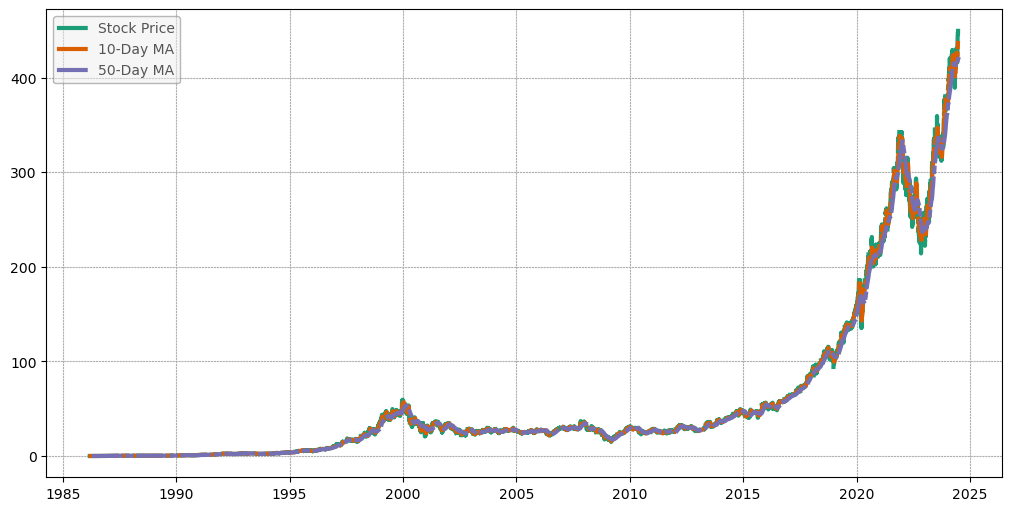

In [4]:
# Plotting
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Stock Price')
plt.plot(data['Fast_MA'], label='10-Day MA')
plt.plot(data['Slow_MA'], label='50-Day MA')
plt.legend()

plt.show()

## Mean Reversion Strategy

In [5]:
data['30_day_mean'] = data['Close'].rolling(window=30).mean()
data['30_day_std'] = data['Close'].rolling(window=30).std()
data['Lower_Band'] = data['30_day_mean'] - (2 * data['30_day_std'])
data.iloc[30:40]

,Open,High,Low,Close,Adj Close,Volume,Fast_MA,Slow_MA,30_day_mean,30_day_std,Lower_Band
Date,,,,,,,,,,,
1986-04-25,0.111111,0.121962,0.111111,0.117188,0.117188,85795200,0.104123,NaN,0.098915,0.005422,0.088072
1986-04-28,0.117188,0.118924,0.116319,0.118056,0.118056,28886400,0.105859,NaN,0.099494,0.006448,0.086598
1986-04-29,0.118056,0.118056,0.113715,0.114583,0.114583,30326400,0.107248,NaN,0.099899,0.006997,0.085905
1986-04-30,0.114583,0.115451,0.109375,0.111979,0.111979,30902400,0.108030,NaN,0.100304,0.007336,0.085632
1986-05-01,0.111979,0.111979,0.108507,0.110243,0.110243,54345600,0.108550,NaN,0.100709,0.007542,0.085624
1986-05-02,0.110243,0.111979,0.109375,0.110243,0.110243,20246400,0.109418,NaN,0.101201,0.007670,0.085861
1986-05-05,0.110243,0.110243,0.109375,0.109375,0.109375,3254400,0.110200,NaN,0.101751,0.007644,0.086462
1986-05-06,0.110243,0.111979,0.110243,0.110243,0.110243,9734400,0.111241,NaN,0.102416,0.007478,0.087460
1986-05-07,0.110243,0.111111,0.108507,0.110243,0.110243,5155200,0.112240,NaN,0.103024,0.007343,0.088337


In [6]:
# Buy signal
buy_signals = data[data['Close'] < data['Lower_Band']]
buy_signals.head(10)

,Open,High,Low,Close,Adj Close,Volume,Fast_MA,Slow_MA,30_day_mean,30_day_std,Lower_Band
Date,,,,,,,,,,,
1986-07-09,0.101563,0.101563,0.096354,0.097222,0.097222,46137600,0.104688,0.110512,0.110547,0.005791,0.098965
1986-07-10,0.097222,0.098090,0.090278,0.094618,0.094618,46886400,0.103386,0.110113,0.109881,0.006424,0.097034
1987-06-11,0.365451,0.367188,0.337674,0.338542,0.338542,268704000,0.380382,0.369887,0.391377,0.022305,0.346767
1987-06-12,0.338542,0.352431,0.337674,0.341146,0.341146,196156800,0.374479,0.370391,0.390712,0.023505,0.343702
1987-07-07,0.337674,0.337674,0.310764,0.313368,0.313368,197078400,0.351823,0.376172,0.365466,0.021062,0.323342
1987-08-03,0.326389,0.328125,0.316840,0.318576,0.318576,116352000,0.339149,0.356866,0.346065,0.013642,0.318780
1987-10-19,0.427083,0.440972,0.312500,0.314236,0.314236,146880000,0.477083,0.417839,0.443446,0.053996,0.335454
1987-10-26,0.322917,0.333333,0.258681,0.272569,0.272569,148320000,0.396094,0.416398,0.433782,0.067555,0.298672
1987-12-03,0.307292,0.310764,0.279514,0.280382,0.280382,127670400,0.314670,0.379444,0.324682,0.021985,0.280713


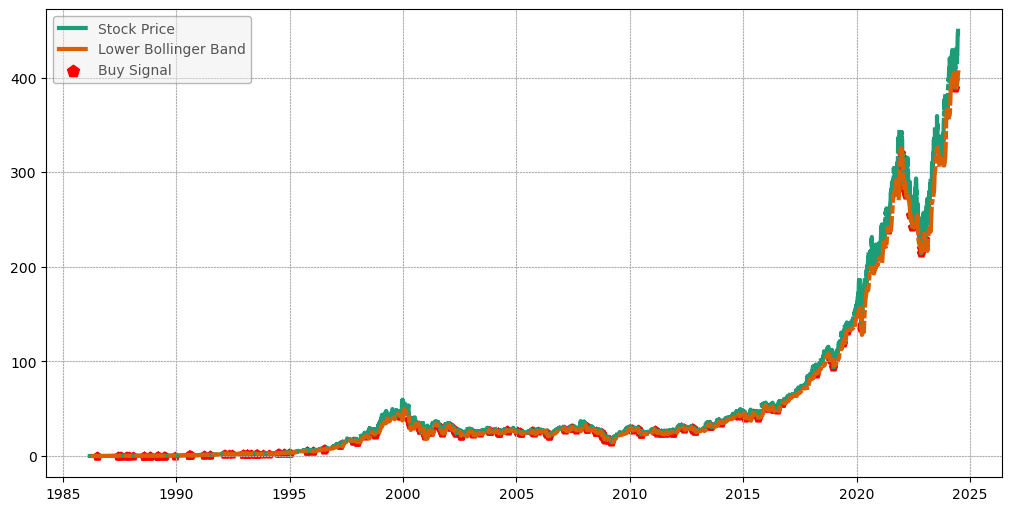

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Stock Price')
plt.plot(data['Lower_Band'], label='Lower Bollinger Band')
plt.scatter(buy_signals.index, buy_signals['Close'], color='red', label='Buy Signal')
plt.legend()
plt.show()

## Momentum Trading Strategy

In [8]:
def compute_rsi(data, window=14):
    delta = data.diff().dropna()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [9]:
# Assuming 'data' is already loaded
data['RSI'] = compute_rsi(data['Close']) # RSI calculation function to be defined
data.iloc[50:60]

,Open,High,Low,Close,Adj Close,Volume,Fast_MA,Slow_MA,30_day_mean,30_day_std,Lower_Band,RSI
Date,,,,,,,,,,,,
1986-05-23,0.107639,0.109375,0.107639,0.107639,0.107639,4089600,0.109983,0.103672,0.108579,0.004857,0.098864,41.666667
1986-05-27,0.107639,0.111111,0.107639,0.111111,0.111111,13881600,0.109983,0.103880,0.108926,0.004642,0.099643,53.333333
1986-05-28,0.111111,0.114583,0.111111,0.114583,0.114583,15523200,0.110243,0.104123,0.109389,0.004482,0.100425,63.157895
1986-05-29,0.114583,0.118924,0.113715,0.117188,0.117188,45676800,0.110851,0.104470,0.109823,0.004588,0.100647,66.668492
1986-05-30,0.118056,0.123264,0.118056,0.121528,0.121528,27072000,0.111892,0.104939,0.110373,0.004967,0.100439,76.001104
1986-06-02,0.121528,0.121528,0.118056,0.118056,0.118056,19728000,0.112500,0.105391,0.110923,0.004870,0.101182,64.287181
1986-06-03,0.118056,0.118056,0.116319,0.118056,0.118056,5011200,0.113281,0.105894,0.111473,0.004705,0.102062,62.964541
1986-06-04,0.118056,0.118924,0.116319,0.117188,0.117188,4723200,0.114063,0.106432,0.112052,0.004271,0.103509,62.964541
1986-06-05,0.117188,0.118924,0.116319,0.118924,0.118924,13708800,0.115191,0.106970,0.112674,0.003831,0.105012,65.518609


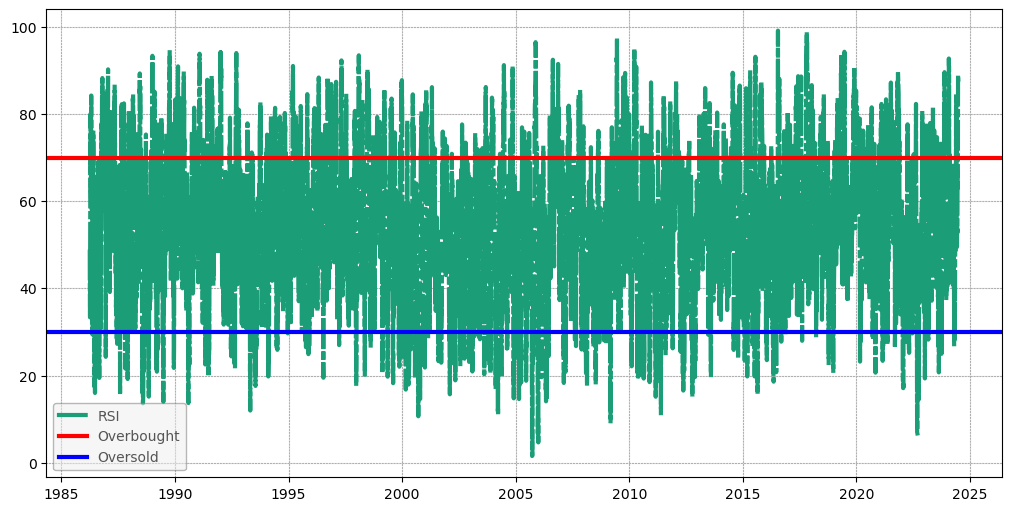

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='-', label='Overbought')
plt.axhline(30, color='blue', linestyle='-', label='Oversold')
plt.legend()
plt.show()

## Pair Trading Strategy

In [11]:
stock1 = yf.download('MSFT')
stock2 = yf.download('AAPL')
display(stock1.head(3))
display(stock2.head(3))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.097222,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.100694,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.102431,133171200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000


In [12]:
stock1 = stock1.reset_index()
stock2 = stock2.reset_index()
display(stock1.head(3))
display(stock2.head(3))

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.097222,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.100694,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.102431,133171200


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000


In [13]:
stock2.loc[stock2['Date']=='1986-03-13']

,Date,Open,High,Low,Close,Adj Close,Volume
1326,1986-03-13,0.110491,0.111607,0.108817,0.110491,0.085276,115964800


In [14]:
stock2 = stock2.iloc[1326:]

In [15]:
print(stock1.shape)
print(stock2.shape)

(9647, 7)
(9647, 7)


In [16]:
score, p_value, _ = coint(stock1['Close'], stock2['Close'])
print('Cointegration test score:', score)
print('P-value:', p_value)

Cointegration test score: -3.2496998425397003
P-value: 0.06200208571666988


## Algorithmic Market Making

In [17]:
# Assuming a data stream is being processed
data['Bid'] = data['Close'] - 0.05
data['Ask'] = data['Close'] + 0.05
data.head()

,Open,High,Low,Close,Adj Close,Volume,Fast_MA,Slow_MA,30_day_mean,30_day_std,Lower_Band,RSI,Bid,Ask
Date,,,,,,,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.097222,1031788800,NaN,NaN,NaN,NaN,NaN,NaN,0.047222,0.147222
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.100694,308160000,NaN,NaN,NaN,NaN,NaN,NaN,0.050694,0.150694
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.102431,133171200,NaN,NaN,NaN,NaN,NaN,NaN,0.052431,0.152431
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.099826,67766400,NaN,NaN,NaN,NaN,NaN,NaN,0.049826,0.149826
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.098090,47894400,NaN,NaN,NaN,NaN,NaN,NaN,0.048090,0.148090
